In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

Sliding Window Embedding is a way to take some one dimensional function, say $f(x)$ and embedd the signal into a higher dimensional space in order to make global (topological) features easier to recognize. The idea behind the sliding window is very simple: 

If we wish to embed a two dimensional signal into 2 dimensions, loop over the data and take every (i, i+1) pair to be points $R^2$. 

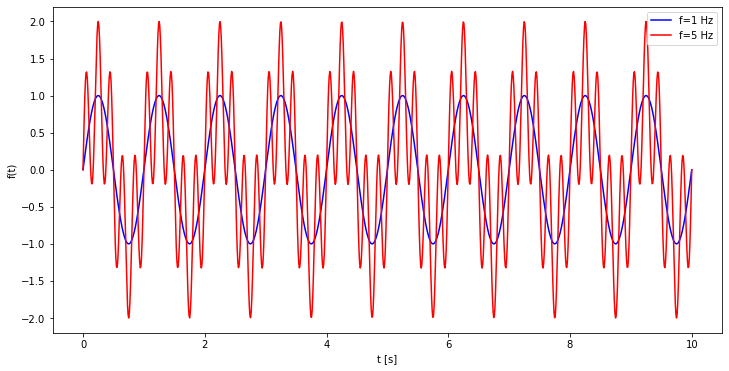

In [62]:
# first create the sample function. We will impose some periodicity to see what structures appear in R2 and R3
t = np.linspace(0, 10, 1000)

f1 = 1 #Hz
f2 = 5  
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

y1 = np.sin(w1*t)
y2 = y1+np.sin(w2*t)
plt.figure(figsize=(12,6))
plt.plot(t,y1, 'b', label='f={0} Hz'.format(f1))
plt.plot(t,y2, 'r', label='f={0} Hz'.format(f2))
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

From this data, we shall now construct various 2d representations. 

In [63]:
x = [1, 2, 3, 4]
for i in range(3): 
    print(np.roll(x,-i))

[1 2 3 4]
[2 3 4 1]
[3 4 1 2]


In [18]:
def embed_2d(y, window_length=1, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-(window_length+1): 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append([y_shift[0], y_shift[window_length]])
        
    return np.array(pts)

In [53]:
def plot_emb(win_len=1):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    emb1 = embed_2d(y1, window_length=win_len)
    emb2 = embed_2d(y2, window_length=win_len)
    ax[0].plot(emb1[:,0], emb1[:,1])
    ax[1].plot(emb2[:,0], emb2[:,1])
    
    ax[0].set_xlabel('t')
    ax[1].set_xlabel('t')
    ax[0].set_ylabel('y1')
    ax[1].set_ylabel('y2')
    
    ax[0].set_aspect('equal')
    ax[1].set_aspect('equal')


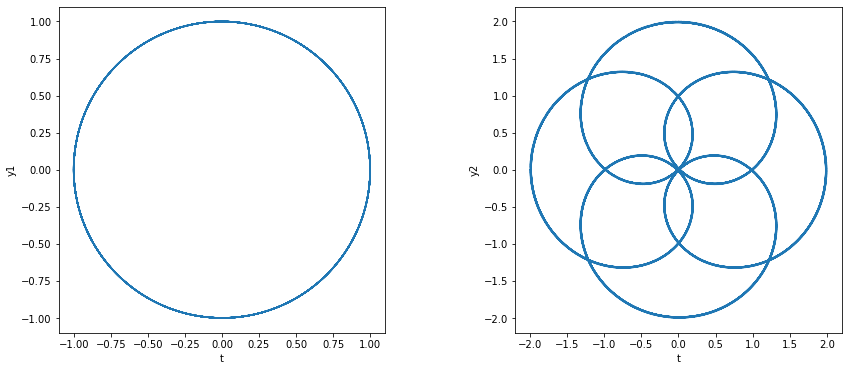

In [64]:
plot_emb(25)

In [37]:
def embed_Nd(y, N=2, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-N: 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append(y_shift[0:N])
        
    return np.array(pts)

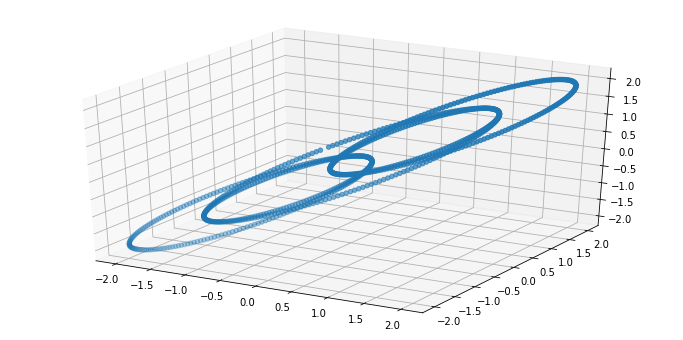

(998, 3)


In [41]:
from mpl_toolkits.mplot3d import Axes3D
emb3 = embed_Nd(y2, N=3)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb3[:,0], emb3[:,1], emb3[:,2])

plt.show()
print(emb3.shape)

Finally, let's do the same thing but with 4 dimeions using a colormap for the extra dim. 

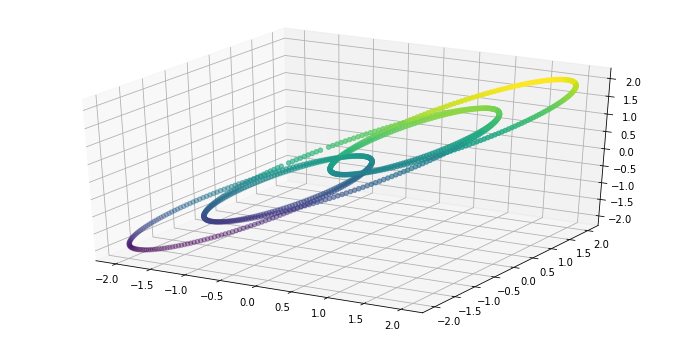

(997, 4)


In [42]:
emb4 = embed_Nd(y2, N=4)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb4[:,0], emb4[:,1], emb4[:,2], c=emb4[:,3])

plt.show()
print(emb4.shape)